# 2. Feature Engineering

In [1]:
import pandas as pd

from paths import PROCESSED_CSV_FILE, FEATURE_ENG_DIR, ENGINEERED_CSVS_DIR
from helpers.constants import TARGETS, FEATURES_VALUE_RANGE, TARGETS_VALUE_RANGE
from ml_tools.logger import custom_logger
from ml_tools.data_exploration import info
info(full_info=False)

Available functions for data exploration:
1 - load_dataframe
2 - summarize_dataframe
3 - drop_rows_with_missing_data
4 - split_features_targets
5 - show_null_columns
6 - drop_columns_with_missing_data
7 - split_continuous_binary
8 - plot_correlation_heatmap
9 - check_value_distributions
10 - plot_value_distributions
11 - clip_outliers_single
12 - clip_outliers_multi
13 - merge_dataframes
14 - save_dataframe
15 - compute_vif
16 - drop_vif_based


In [2]:
from ml_tools.data_exploration import load_dataframe, summarize_dataframe, drop_rows_with_missing_data, split_features_targets, show_null_columns, drop_columns_with_missing_data, split_continuous_binary, plot_correlation_heatmap, plot_value_distributions, clip_outliers_multi, merge_dataframes, save_dataframe

## 1. Load dataset

In [3]:
df_raw = load_dataframe(df_path=PROCESSED_CSV_FILE)

DataFrame shape (1220, 123)


In [4]:
summarize_dataframe(df_raw)

Shape: (1220, 123)


,Data Type,Non-Null Count,Unique Values,Missing %,mean,std,min,25%,50%,75%,max
coating_material,float64,640,2,47.54,0.71,0.45,0.0,0.0,1.0,1.0,1.00
dopant_Li,int64,1220,2,0.00,0.00,0.06,0.0,0.0,0.0,0.0,1.00
dopant_B,int64,1220,2,0.00,0.02,0.14,0.0,0.0,0.0,0.0,1.00
dopant_C,int64,1220,2,0.00,0.00,0.03,0.0,0.0,0.0,0.0,1.00
dopant_N,int64,1220,2,0.00,0.03,0.17,0.0,0.0,0.0,0.0,1.00
...,...,...,...,...,...,...,...,...,...,...,...
molar_ratio_C,float64,1220,6,0.00,0.00,0.01,0.0,0.0,0.0,0.0,0.20
molar_ratio_Se,float64,1220,2,0.00,0.00,0.02,0.0,0.0,0.0,0.0,0.50
molar_ratio_La,float64,1220,11,0.00,0.01,0.07,0.0,0.0,0.0,0.0,1.00
molar_ratio_Gd,float64,1220,4,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.01


In [5]:
df_full = drop_rows_with_missing_data(df=df_raw, threshold=0.3)

No rows have more than 30% missing data.


In [6]:
summarize_dataframe(df_full)

Shape: (1220, 123)


,Data Type,Non-Null Count,Unique Values,Missing %,mean,std,min,25%,50%,75%,max
coating_material,float64,640,2,47.54,0.71,0.45,0.0,0.0,1.0,1.0,1.00
dopant_Li,int64,1220,2,0.00,0.00,0.06,0.0,0.0,0.0,0.0,1.00
dopant_B,int64,1220,2,0.00,0.02,0.14,0.0,0.0,0.0,0.0,1.00
dopant_C,int64,1220,2,0.00,0.00,0.03,0.0,0.0,0.0,0.0,1.00
dopant_N,int64,1220,2,0.00,0.03,0.17,0.0,0.0,0.0,0.0,1.00
...,...,...,...,...,...,...,...,...,...,...,...
molar_ratio_C,float64,1220,6,0.00,0.00,0.01,0.0,0.0,0.0,0.0,0.20
molar_ratio_Se,float64,1220,2,0.00,0.00,0.02,0.0,0.0,0.0,0.0,0.50
molar_ratio_La,float64,1220,11,0.00,0.01,0.07,0.0,0.0,0.0,0.0,1.00
molar_ratio_Gd,float64,1220,4,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.01


## 2. Get splits (Features, Target)

In [7]:
df_targets, df_features = split_features_targets(df=df_full, targets=TARGETS)

Original shape: (1220, 123)
Targets shape: (1220, 3)
Features shape: (1220, 120)


## 3. Null values

In [8]:
null_cols_features = show_null_columns(df_features)
null_cols_features

,Missing Count,Missing %
annealing_time_3(hour),1142,93.61
annealing_temperature_3(K),1141,93.52
precursor_temperature,1051,86.15
precursor_pH,1045,85.66
particle_size_secondary(um),818,67.05
annealing_time_2(hour),708,58.03
annealing_temperature_2(K),688,56.39
particle_size_primary(um),676,55.41
coating_material,580,47.54
electrolyte_molarity,517,42.38


In [9]:
null_cols_targets = show_null_columns(df_targets)
null_cols_targets

,Missing Count,Missing %
first_coulombic_efficiency(%),518,42.46
capacity_retention(%),246,20.16
capacity(mAh/g),157,12.87


In [10]:
total_null_cols = merge_dataframes(null_cols_features, null_cols_targets, direction="vertical")

DataFrame 1 shape: (24, 2)
DataFrame 2 shape: (3, 2)
Merged DataFrame shape: (27, 2)


In [11]:
custom_logger(data=total_null_cols, save_directory=FEATURE_ENG_DIR, log_name="missing data")

Log saved to: /home/karl/lithium_battery/data/Feature Engineering/missing_data_20250613_1518


Drop columns with too many Null values from the main dataframe

In [12]:
df_lessnulls_features = drop_columns_with_missing_data(df_features, threshold=0.7)
show_null_columns(df_lessnulls_features)

Dropping columns with more than 70% missing data:
['precursor_pH', 'precursor_temperature', 'annealing_temperature_3(K)', 'annealing_time_3(hour)']


,Missing Count,Missing %
particle_size_secondary(um),818,67.05
annealing_time_2(hour),708,58.03
annealing_temperature_2(K),688,56.39
particle_size_primary(um),676,55.41
coating_material,580,47.54
electrolyte_molarity,517,42.38
polycrystalline,461,37.79
cycles,379,31.07
annealing_time_1(hour),342,28.03
annealing_temperature_1(K),320,26.23


## 4. Split features: Continuous - Binary

In [13]:
df_continuous, df_binary = split_continuous_binary(df=df_lessnulls_features)

Continuous columns shape: (1220, 41)
Binary columns shape: (1220, 75)


In [14]:
summarize_dataframe(df_binary)

Shape: (1220, 75)


,Data Type,Non-Null Count,Unique Values,Missing %,mean,std,min,25%,50%,75%,max
C2/m,int64,1220,2,0.00,0.01,0.09,0.0,0.0,0.0,0.0,1.0
Cubic,int64,1220,2,0.00,0.00,0.04,0.0,0.0,0.0,0.0,1.0
Fd-3m,int64,1220,2,0.00,0.00,0.06,0.0,0.0,0.0,0.0,1.0
Hexagonal,int64,1220,2,0.00,0.01,0.11,0.0,0.0,0.0,0.0,1.0
Monoclinic,int64,1220,2,0.00,0.00,0.03,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
solvent_EMC,float64,1105,2,9.43,0.31,0.46,0.0,0.0,0.0,1.0,1.0
solvent_FEC,float64,1105,2,9.43,0.03,0.18,0.0,0.0,0.0,0.0,1.0
solvent_PC,float64,1105,2,9.43,0.01,0.11,0.0,0.0,0.0,0.0,1.0
solvent_VC,float64,1105,2,9.43,0.12,0.33,0.0,0.0,0.0,0.0,1.0


## 5. Value Distributions

Plot all distributions to get correct clip values (except binary columns)

In [ ]:
plot_value_distributions(df=df_continuous, save_dir=FEATURE_ENG_DIR)

In [ ]:
plot_value_distributions(df=df_targets, save_dir=FEATURE_ENG_DIR)

## 6. Clip values

Use maximum and minimum values to clip outliers

In [15]:
df_clip_continuous = clip_outliers_multi(df=df_continuous, clip_dict=FEATURES_VALUE_RANGE)

Clipped 8 columns.


In [16]:
summarize_dataframe(df_clip_continuous)

Shape: (1220, 41)


,Data Type,Non-Null Count,Unique Values,Missing %,mean,std,min,25%,50%,75%,max
particle_size_primary(um),float64,544,101,55.41,4.87,6.75,0.0,0.30,1.48,8.70,40.00
particle_size_secondary(um),float64,402,55,67.05,9.76,6.50,0.0,5.00,10.00,12.00,40.00
annealing_temperature_1(K),float64,900,62,26.23,881.67,178.22,600.0,753.15,773.15,1025.65,1250.00
annealing_temperature_2(K),float64,532,33,56.39,1029.83,165.93,600.0,1023.15,1073.15,1123.15,1250.00
annealing_time_1(hour),float64,878,20,28.03,8.33,5.45,1.0,5.00,6.00,10.00,24.00
annealing_time_2(hour),float64,512,19,58.03,12.51,4.91,1.0,10.00,12.00,15.00,24.00
average_voltage(V),float64,1140,55,6.56,3.51,0.26,0.6,3.40,3.55,3.65,4.50
electrolyte_molarity,float64,703,13,42.38,1.06,0.46,0.1,1.00,1.00,1.00,10.00
cycles,float64,841,45,31.07,215.61,281.00,5.0,100.00,100.00,200.00,3000.00
molar_ratio_Li,float64,1220,146,0.00,0.26,0.16,0.0,0.25,0.25,0.29,1.00


In [17]:
df_clip_targets = clip_outliers_multi(df=df_targets, clip_dict=TARGETS_VALUE_RANGE)

Clipped 3 columns.


In [18]:
summarize_dataframe(df_clip_targets)

Shape: (1220, 3)


,Data Type,Non-Null Count,Unique Values,Missing %,mean,std,min,25%,50%,75%,max
capacity(mAh/g),float64,1063,635,12.87,206.10,47.60,0.10,183.3,201.68,226.30,400.0
capacity_retention(%),float64,974,375,20.16,71.31,30.62,1.03,59.7,83.00,92.57,100.0
first_coulombic_efficiency(%),float64,702,373,42.46,83.91,12.30,1.02,81.0,86.00,89.97,100.0


## 7. Correlation Heatmap

Continuous features

Saved correlation heatmap to: /home/karl/lithium_battery/data/Feature Engineering/Continuous_Features_Correlation_Heatmap.svg


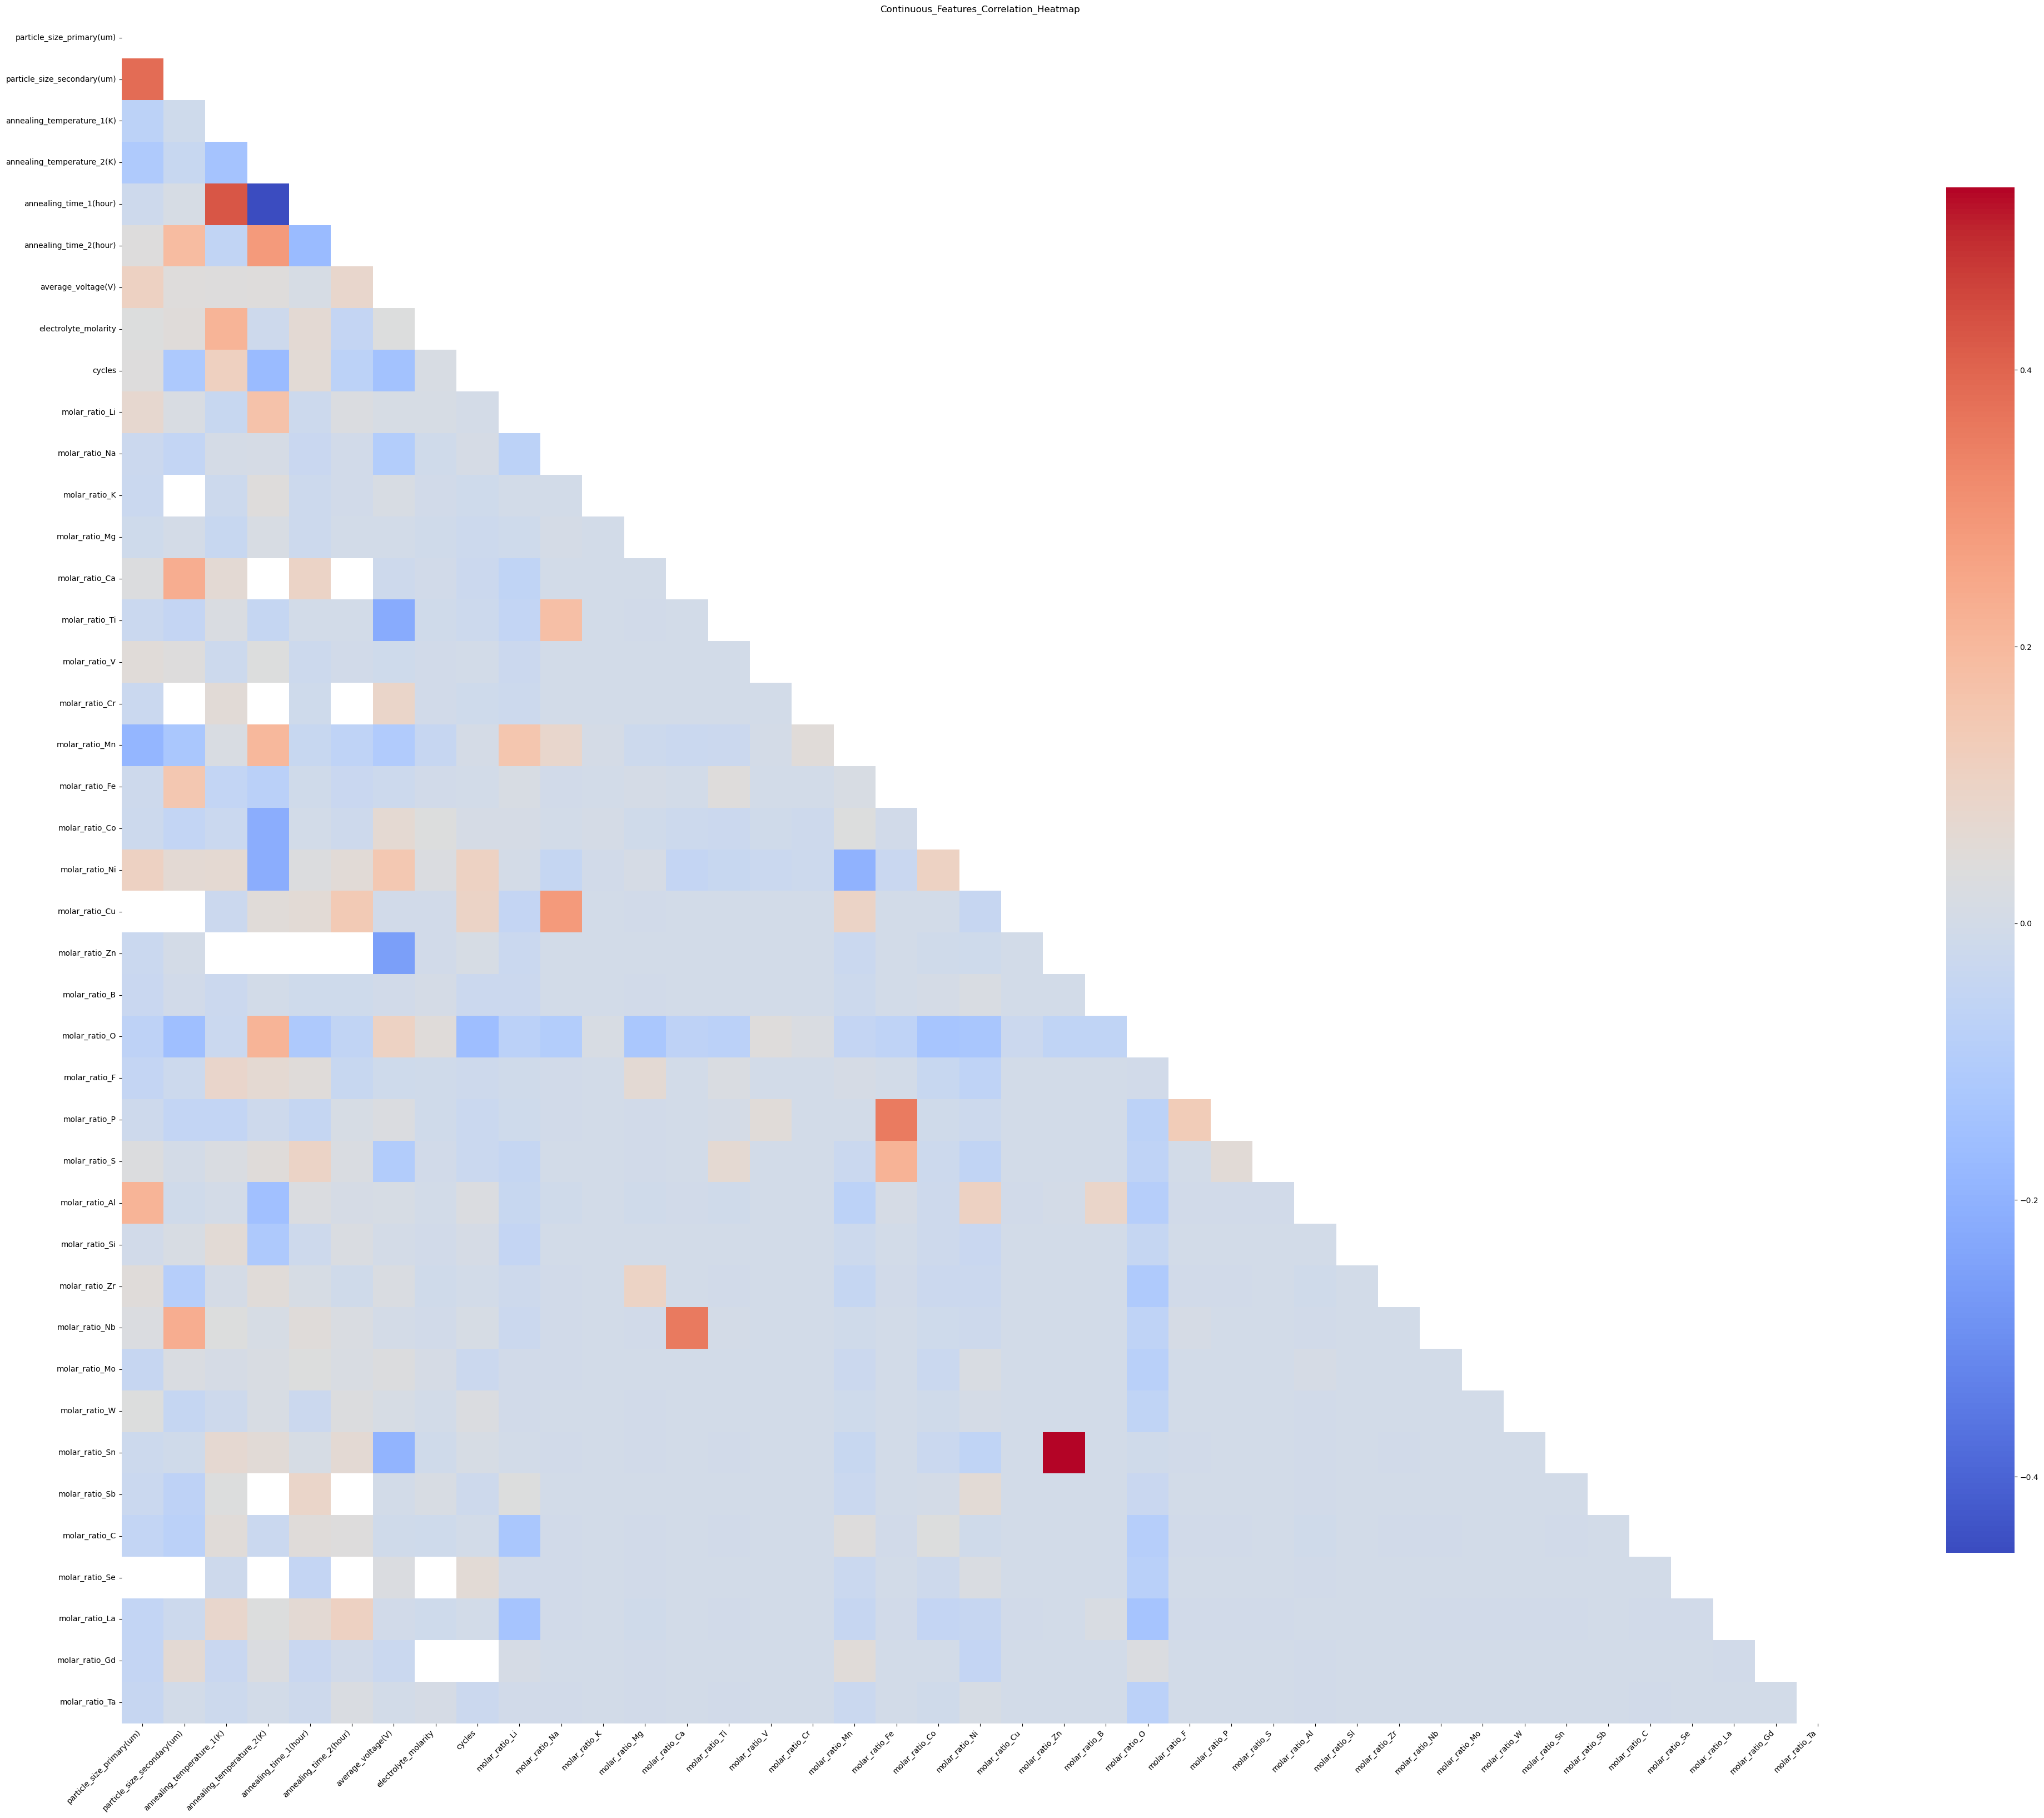

In [19]:
plot_correlation_heatmap(df=df_clip_continuous, save_dir=FEATURE_ENG_DIR, plot_title="Continuous Features Correlation Heatmap")

Binary features

Saved correlation heatmap to: /home/karl/lithium_battery/data/Feature Engineering/Binary_Features_Correlation_Heatmap.svg


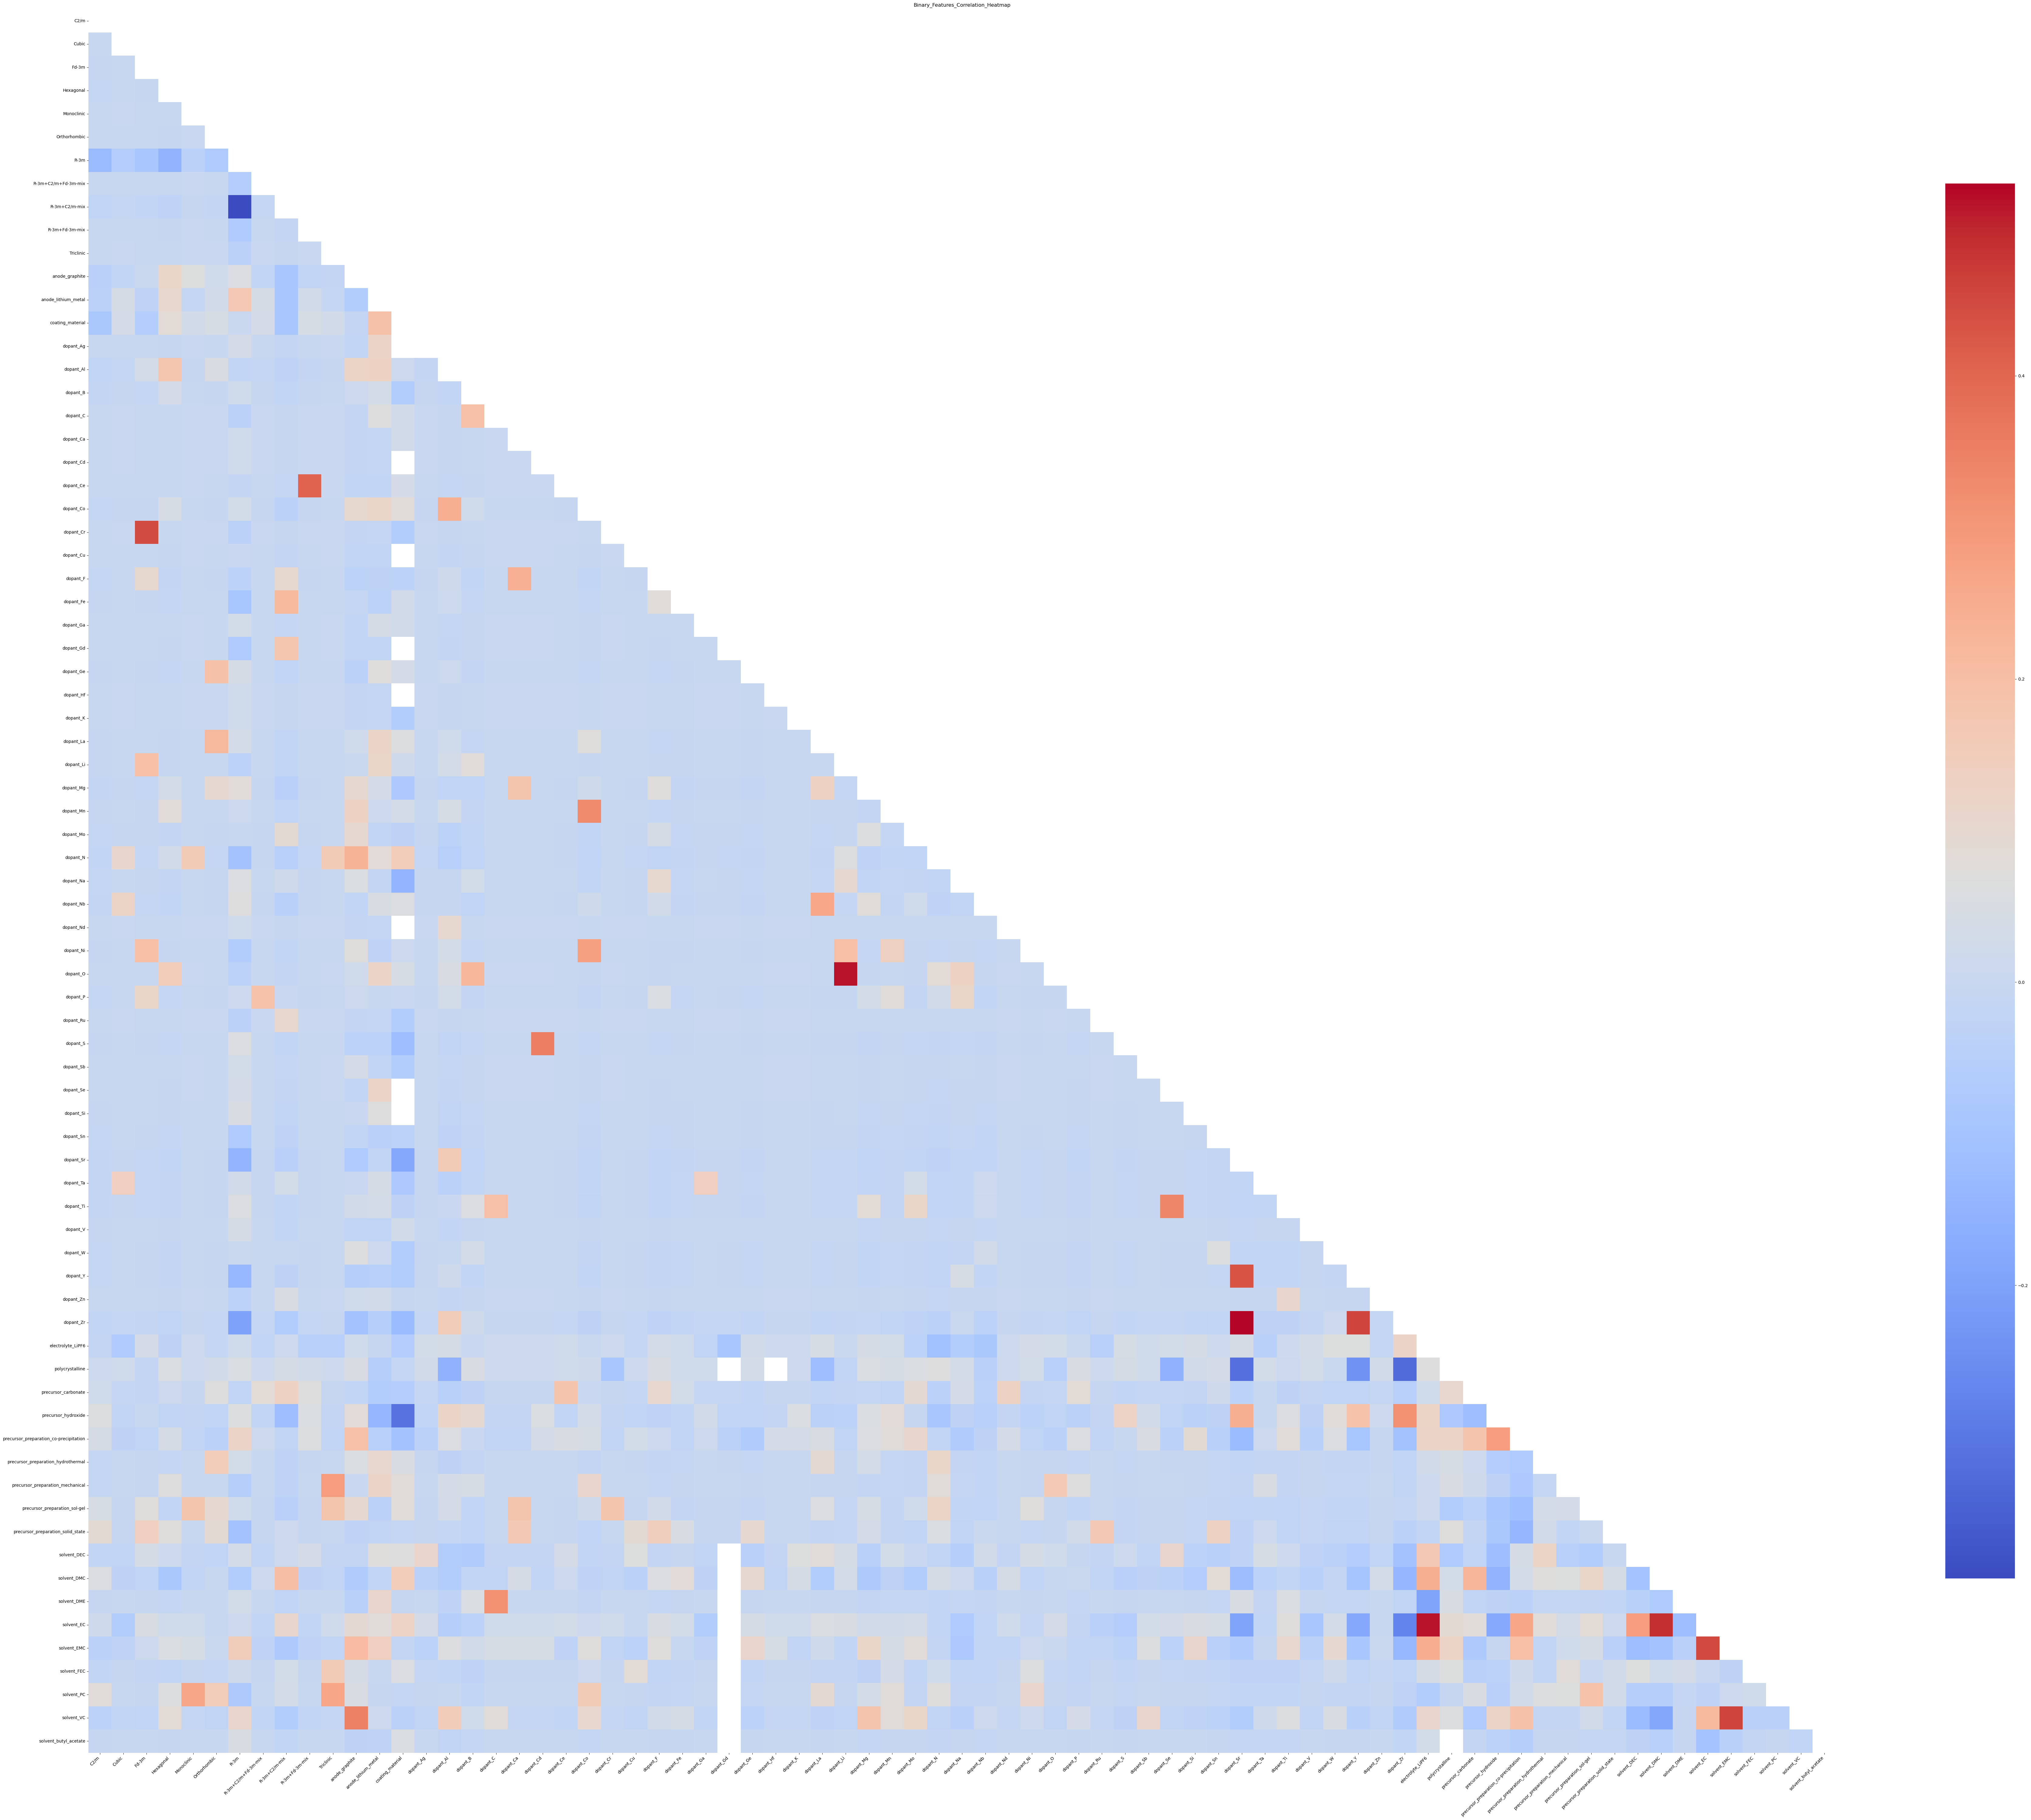

In [20]:
plot_correlation_heatmap(df=df_binary, save_dir=FEATURE_ENG_DIR, plot_title="Binary Features Correlation Heatmap")

## 8. Merge and Save Datasets

### 8.1 Make extra datasets with a stern threshold for missing data

In [25]:
show_null_columns(df_clip_targets)

,Missing Count,Missing %
first_coulombic_efficiency(%),518,42.46
capacity_retention(%),246,20.16
capacity(mAh/g),157,12.87


In [28]:
show_null_columns(df_clip_continuous)

,Missing Count,Missing %
particle_size_secondary(um),818,67.05
annealing_time_2(hour),708,58.03
annealing_temperature_2(K),688,56.39
particle_size_primary(um),676,55.41
electrolyte_molarity,517,42.38
cycles,379,31.07
annealing_time_1(hour),342,28.03
annealing_temperature_1(K),320,26.23
average_voltage(V),80,6.56


In [30]:
df_clip_continuous_strict = drop_columns_with_missing_data(df_clip_continuous, threshold=0.5)
show_null_columns(df_clip_continuous_strict)

Dropping columns with more than 50% missing data:
['particle_size_primary(um)', 'particle_size_secondary(um)', 'annealing_temperature_2(K)', 'annealing_time_2(hour)']


,Missing Count,Missing %
electrolyte_molarity,517,42.38
cycles,379,31.07
annealing_time_1(hour),342,28.03
annealing_temperature_1(K),320,26.23
average_voltage(V),80,6.56


In [29]:
show_null_columns(df_binary)

,Missing Count,Missing %
coating_material,580,47.54
polycrystalline,461,37.79
solvent_DEC,115,9.43
solvent_DMC,115,9.43
solvent_DME,115,9.43
solvent_EC,115,9.43
solvent_EMC,115,9.43
solvent_FEC,115,9.43
solvent_PC,115,9.43
solvent_VC,115,9.43


In [31]:
df_binary_strict = drop_columns_with_missing_data(df_binary, threshold=0.4)
show_null_columns(df_binary_strict)

Dropping columns with more than 40% missing data:
['coating_material']


,Missing Count,Missing %
polycrystalline,461,37.79
solvent_DEC,115,9.43
solvent_DMC,115,9.43
solvent_DME,115,9.43
solvent_EC,115,9.43
solvent_EMC,115,9.43
solvent_FEC,115,9.43
solvent_PC,115,9.43
solvent_VC,115,9.43
solvent_butyl_acetate,115,9.43


### 8.2 Merge resulting dataframes

In [32]:
# original versions
df_processed_full = merge_dataframes(df_clip_continuous, df_binary, df_clip_targets)
df_processed_no_binary = merge_dataframes(df_clip_continuous, df_clip_targets)

DataFrame 1 shape: (1220, 41)
DataFrame 2 shape: (1220, 75)
DataFrame 3 shape: (1220, 3)
Merged DataFrame shape: (1220, 119)
DataFrame 1 shape: (1220, 41)
DataFrame 2 shape: (1220, 3)
Merged DataFrame shape: (1220, 44)


In [33]:
# strict versions
df_processed_full_strict = merge_dataframes(df_clip_continuous_strict, df_binary_strict, df_clip_targets)
df_processed_no_binary_strict = merge_dataframes(df_clip_continuous_strict, df_clip_targets)

DataFrame 1 shape: (1220, 37)
DataFrame 2 shape: (1220, 74)
DataFrame 3 shape: (1220, 3)
Merged DataFrame shape: (1220, 114)
DataFrame 1 shape: (1220, 37)
DataFrame 2 shape: (1220, 3)
Merged DataFrame shape: (1220, 40)


### 8.3 Save dataframes

In [34]:
save_dataframe(df=df_processed_full, save_dir=ENGINEERED_CSVS_DIR, filename="full")
save_dataframe(df=df_processed_full_strict, save_dir=ENGINEERED_CSVS_DIR, filename="full strict")

Saved file: 'full.csv'
Saved file: 'full_strict.csv'


In [35]:
save_dataframe(df=df_processed_no_binary, save_dir=ENGINEERED_CSVS_DIR, filename="no binary")
save_dataframe(df=df_processed_no_binary_strict, save_dir=ENGINEERED_CSVS_DIR, filename="no binary strict")

Saved file: 'no_binary.csv'
Saved file: 'no_binary_strict.csv'
